In [15]:
import pandas as pd

### Pandas: merging by closest date example

In [16]:
left = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5], 
    "date":[
        "06/22/2014",
        "07/02/2014",
        "01/01/2015",
        "01/01/1991",
        "08/02/1999"
    ]})

right = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5, 6, 7], 
    "date":[
        "02/15/2015",
        "06/30/2014",
        "07/02/1999",
        "10/05/1990",
        "06/24/2014",
        "12/12/2222",
        "12/13/2222"
    ], "value": [333, 222, 444, 777, 42, 0, 0] 
})

left['date']  = pd.to_datetime(left.date)
right['date'] = pd.to_datetime(right.date)
left.sort_values('date', inplace=True)
right.sort_values('date', inplace=True)

In [17]:
left, right

(   ID       date
 3   4 1991-01-01
 4   5 1999-08-02
 0   1 2014-06-22
 1   2 2014-07-02
 2   3 2015-01-01,
    ID       date  value
 3   4 1990-10-05    777
 2   3 1999-07-02    444
 4   5 2014-06-24     42
 1   2 2014-06-30    222
 0   1 2015-02-15    333
 5   6 2222-12-12      0
 6   7 2222-12-13      0)

In [18]:
right1 = right.set_index('date').reindex(left.set_index('date').index, method='nearest').reset_index()

pd.merge(left, right1, on='date', suffixes=('_a', '_b'))

,ID_a,date,ID_b,value
0,4,1991-01-01,4,777
1,5,1999-08-02,3,444
2,1,2014-06-22,5,42
3,2,2014-07-02,2,222
4,3,2015-01-01,1,333


### Merging Engine data by closest time

In [19]:
egtm = pd.read_csv('./EGTM.csv', parse_dates=['RECORDED_DT'])

In [20]:
egtm_cols = egtm.columns[:5]
egtm = egtm[egtm_cols]
egtm = egtm[egtm['AIRCRAFT'] == 'VQ-BDQ']
egtm = egtm[egtm['POSITION'] == 1]
egtm['reportts'] = pd.to_datetime(egtm['RECORDED_DT'], format='mixed')
egtm['egtm_reportts'] = egtm['reportts']

In [21]:
neo = pd.read_csv(
    './a320_a321_neo_full_acms_parameters.csv', 
    parse_dates=['reportts', 'processedts'], 
)
neo = neo[neo['acnum'] == 'VQ-BDQ']
neo = neo[neo['pos'] == 1]

/tmp/ipykernel_41526/3501257036.py:1: DtypeWarning: Columns (140,152,171,175) have mixed types. Specify dtype option on import or set low_memory=False.
  neo = pd.read_csv(


ACMS = Aircraft Condition Monitoring System

In [22]:
neo.head()

,acnum,reportname,reportts,file_path,pos,fltdes,dep,arr,ivs12,ibe,...,vsva,w14,processedts,pf,wai,nai,prv,hpv,xf,reason
31524,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2019-04-18 08:07:31,ecm/S7_NEO_320_321/VQ-BDI/VQ-BDP18042019081437...,1,0.0,UDYZ,UNNT,NaN,NaN,...,0.0,NaN,2023-09-23 07:58:31.342,0.54,0.0,0.0,1.0,0.0,0.0,STW 36 BIT 20
31529,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2019-04-18 08:07:31,ecm/S7_NEO_320_321/VQ-BDI/VQ-BDP18042019081437...,1,0.0,UDYZ,UNNT,NaN,NaN,...,0.0,NaN,2023-09-23 07:58:31.456,0.54,0.0,0.0,1.0,0.0,0.0,STW 36 BIT 20
31531,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2019-04-18 02:53:55,ecm/S7_NEO_320_321/VQ-BDI/VQ-BDP18042019081437...,1,5593.0,UNNT,UDYZ,NaN,NaN,...,0.0,NaN,2023-09-23 07:58:30.926,0.48,0.0,0.0,1.0,1.0,0.0,STW 16 BIT 27
31546,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2019-04-18 02:56:14,ecm/S7_NEO_320_321/VQ-BDI/VQ-BDP18042019081437...,1,0.0,UNNT,UDYZ,NaN,NaN,...,0.0,NaN,2023-09-23 07:58:31.062,0.40,0.0,0.0,1.0,1.0,0.0,STW 36 BIT 20
31548,VQ-BDQ,A320 EEC MAINTENANCE REPORT,2019-04-18 02:56:14,ecm/S7_NEO_320_321/VQ-BDI/VQ-BDP18042019081437...,1,0.0,UNNT,UDYZ,NaN,NaN,...,0.0,NaN,2023-09-23 07:58:31.211,0.40,0.0,0.0,1.0,1.0,0.0,STW 36 BIT 20


#### Data frequency by time:

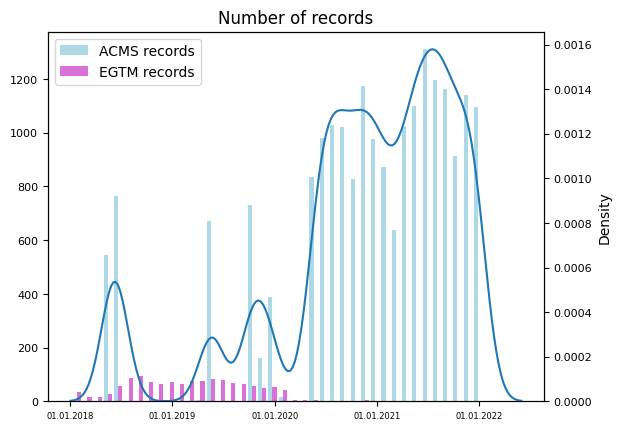

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

neo_report_timepoints = neo[neo['reportts'].dt.year < 2023 ]['reportts']
neo_report_timepoints = mdates.date2num(neo_report_timepoints)

plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=8)

fig, ax = plt.subplots()

ax2 = ax.twinx()

egtm_report_timepoints = egtm[egtm['reportts'].dt.year < 2023]['reportts']
egtm_report_timepoints = mdates.date2num(egtm_report_timepoints)

ax.hist([neo_report_timepoints, egtm_report_timepoints], bins=40, color=('lightblue', 'orchid'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

sns.kdeplot(neo_report_timepoints, ax=ax2);
plt.title("Number of records")

ax.legend(['ACMS records', 'EGTM records'])

plt.show()



#### Merging with EGTM table by closest recorded date (using indexes)

In [24]:
neo.sort_values('reportts', inplace=True)
egtm.sort_values('reportts', inplace=True)

neo = neo.set_index('reportts')
egtm = egtm.set_index('reportts')

In [25]:
egtm1 = egtm.reindex(neo.index, method='ffill').reset_index()

In [26]:
merged = pd.merge(neo, egtm1, on='reportts')
merged.count()

reportts         20997
acnum            20997
reportname       20997
file_path        20997
pos              20997
                 ...  
POSITION         20997
ESN              20997
RECORDED_DT      20997
RWCTOMAR         20997
egtm_reportts    20997
Length: 220, dtype: int64

In [27]:
merged['diff'] = (merged['reportts'] - merged['egtm_reportts']) \
  .astype('timedelta64[h]')

ValueError: Cannot convert from timedelta64[ns] to timedelta64[h]. Supported resolutions are 's', 'ms', 'us', 'ns'

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

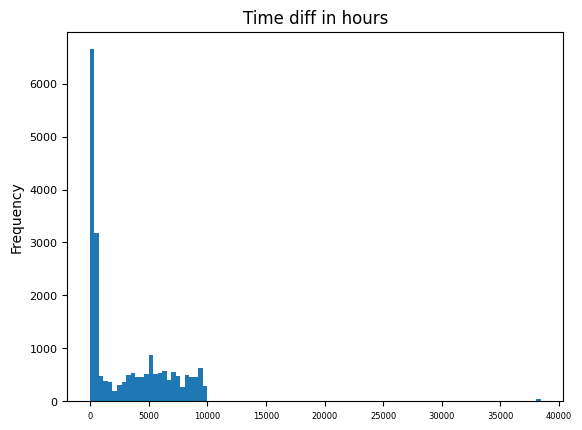

In [ ]:
merged['diff'].plot.hist(bins=100, title='Time diff in hours')

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

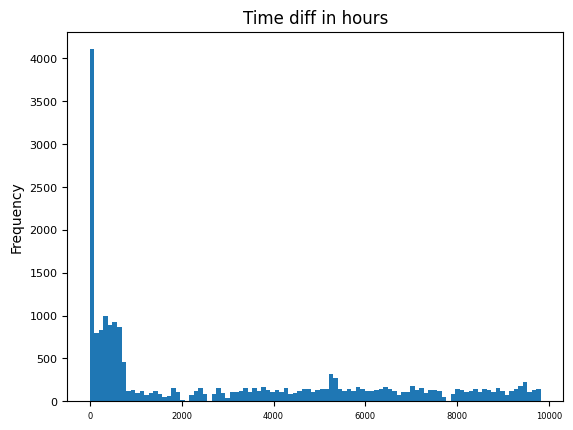

In [ ]:
merged_filtered = merged[merged['diff'] <= 10_000]
merged_filtered['diff'].plot.hist(bins=100, title='Time diff in hours')

In [ ]:
merged_filtered['diff'].count()

20956

<Axes: title={'center': 'Time diff in hours'}, ylabel='Frequency'>

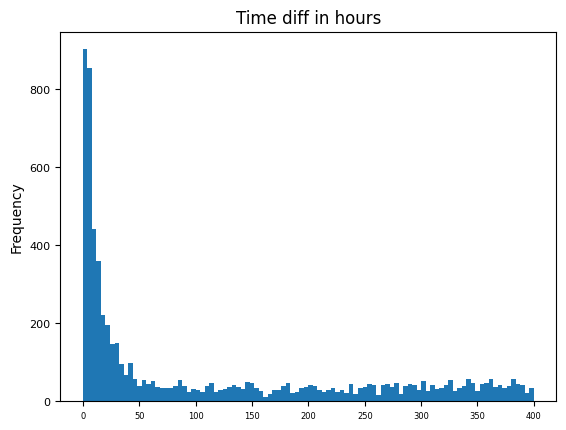

In [ ]:
merged_filtered = merged[merged['diff'] <= 400]
merged_filtered['diff'].plot.hist(bins=100, title='Time diff in hours')

Вывод: Половине записей в таблице neo соответствует запись в egtm в окне +/- 400 часов

In [ ]:
merged_filtered['diff'].count()

6772

### Эксперименты с частотой TAKEOFF

**TODO:**

1. Построить таблицу в рамках одного дня и построить количество данных слева и справа 
2. Отдельно для report name == TAKEOFF 
3. Сравнить частоту записей в рамках одного дня

In [ ]:
egtm_line = egtm[
    (egtm['RECORDED_DT'].dt.year == 2019) & 
    (egtm['RECORDED_DT'].dt.month == 5)
].index
egtm.index

DatetimeIndex(['2018-01-06 22:12:00', '2018-01-07 08:26:00',
               '2018-01-07 13:56:00', '2018-01-07 19:40:00',
               '2018-01-08 03:01:00', '2018-01-08 08:41:00',
               '2018-01-08 14:11:00', '2018-01-08 19:45:00',
               '2018-01-09 05:11:00', '2018-01-09 10:39:00',
               ...
               '2020-08-01 16:16:00', '2020-09-01 07:59:00',
               '2020-09-01 16:49:00', '2020-10-01 04:01:00',
               '2020-10-01 07:36:00', '2020-11-01 05:46:00',
               '2020-11-01 21:33:00', '2020-12-01 00:02:00',
               '2020-12-01 05:05:00', '2020-12-01 13:11:00'],
              dtype='datetime64[ns]', name='reportts', length=1284, freq=None)

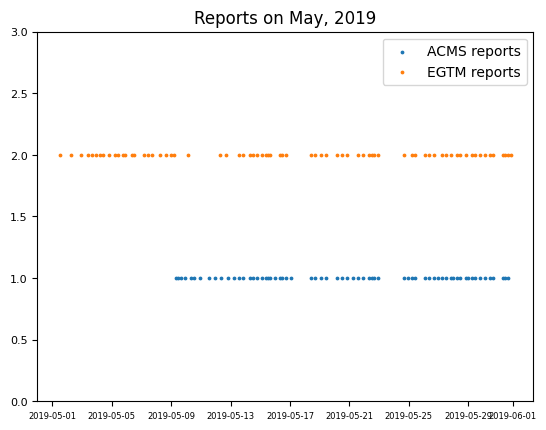

In [ ]:
acms_line = neo[
    (pd.to_datetime(neo.index).year == 2019) & 
    (pd.to_datetime(neo.index).month == 5) & 
    (neo['reportname'] == 'A320 ENGINE TAKE OFF REPORT')
].index

egtm_line = egtm[
    (egtm['RECORDED_DT'].dt.year == 2019) & 
    (egtm['RECORDED_DT'].dt.month == 5)
].index

fig, ax = plt.subplots()

ax.scatter(acms_line, y=acms_line.map(lambda _ : 1), s=3)
ax.scatter(egtm_line, y=egtm_line.map(lambda _: 2), s=3)
ax.legend(["ACMS reports", "EGTM reports"])
ax.set_ylim([0, 3])
ax.set_title("Reports on May, 2019")
plt.show()

In [ ]:
pd.DataFrame([egtm_line, acms_line]).T

,0,1
0,2020-11-01 05:46:00,2020-11-01 08:21:03
1,2020-11-01 21:33:00,2020-11-01 14:29:02
2,NaT,2020-11-01 22:14:41
3,NaT,2020-11-02 02:24:15
4,NaT,2020-11-02 07:04:19
...,...,...
101,NaT,2020-11-29 16:01:54
102,NaT,2020-11-30 00:13:23
103,NaT,2020-11-30 10:54:14
104,NaT,2020-11-30 16:24:47


1. Строить по одной модели на каждый признак 
1. Более поздние на тест 
1. Модели: XGBoost, LinReg, RandomForest
1. Составить таблицу с результатами
1. Вначале взять только Takeoff
1. Затем попробовать Cruise
1. Метрика rmse 
1. Время не является признаком (только числовые фичи)
1. Самый важный параметр - EGTMARGIN
1. Проблемы автокореляции? 

Подготовить функции для построения графиков predict/target

Заказчик Шманатов